## Preliminaries: data loading and setup

In [1]:
# set wd
setwd("../R")

# dependencies
require(here)
require(ggplot2)
require(psych)
require(gridExtra)

# read data and calculate sum scores
source(here("utilities", "source_data.R"))

# read metrics
metrics <- read.csv(here("..", "..", "data", "metrics.csv"))

Loading required package: here

here() starts at /Users/danielbennett/Documents/Git/silver-screen/analysis/R

Loading required package: ggplot2

Loading required package: psych


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: gridExtra



## Tile plots (overall correlations)

Loading required package: reshape2

Warning message:
“Removed 17 rows containing missing values (geom_point).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 13 rows containing missing values (geom_point).”


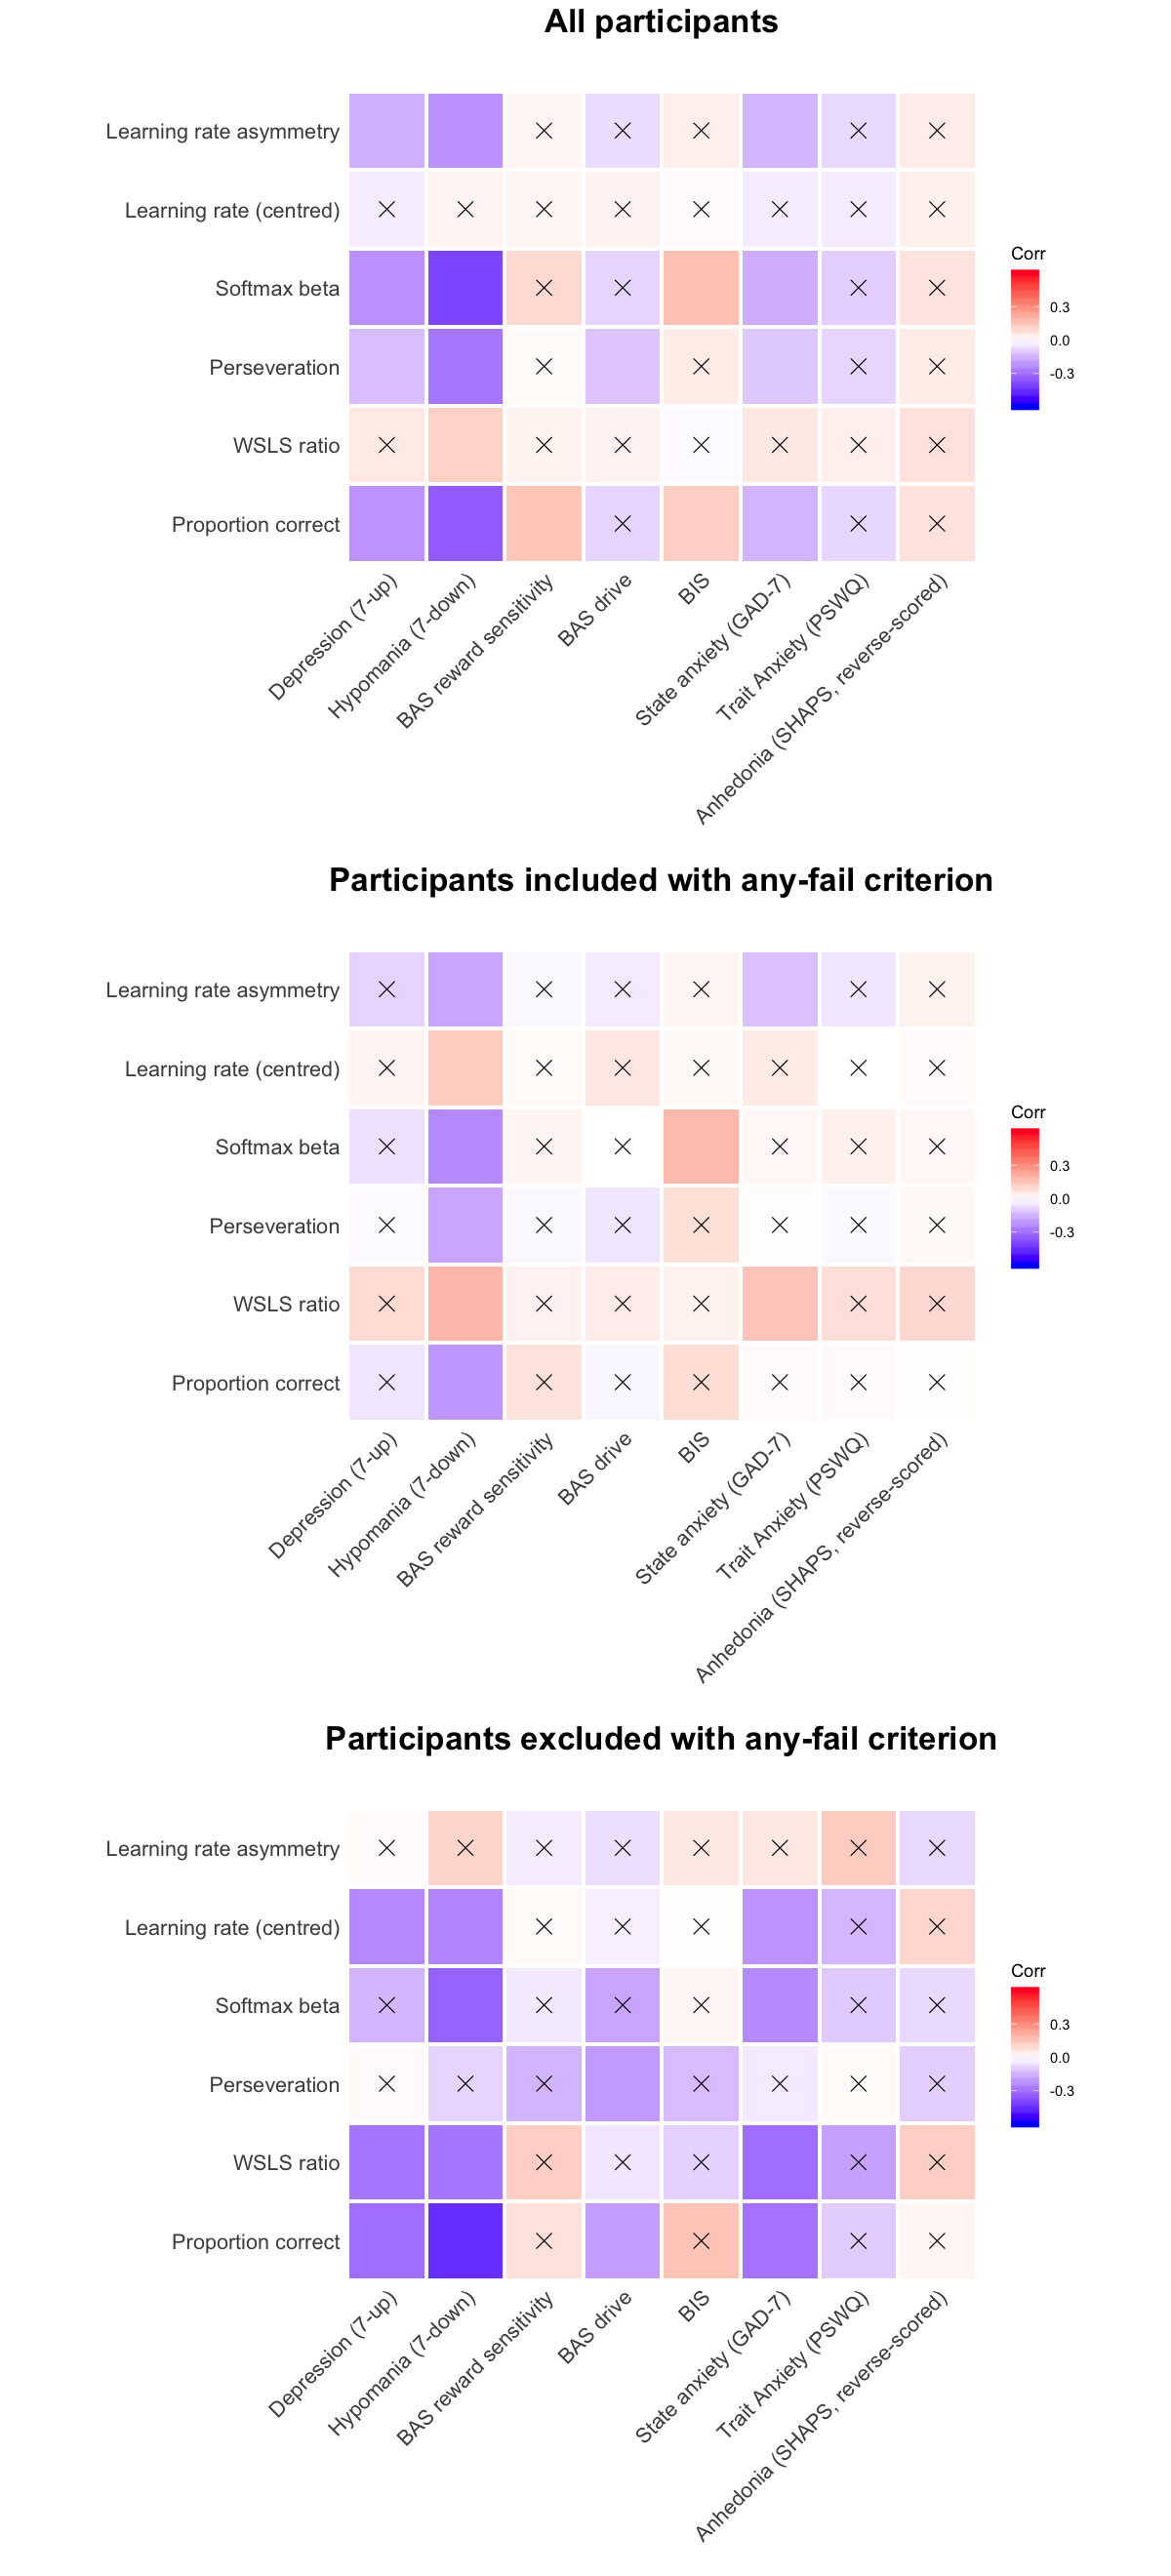

In [2]:
# read utilities for calculating tile plots
source(here("utilities", "make_tile_plot.R"))

# first pass: correlations with different measures with/without screening
survey_measures <- c("seven_down", "seven_up", "bas_rwd", "bas_drive", "bis", "gad7", "pswq", "shaps")
survey_names <- c("Depression (7-up)", "Hypomania (7-down)", "BAS reward sensitivity", "BAS drive", "BIS", "State anxiety (GAD-7)", "Trait Anxiety (PSWQ)", "Anhedonia (SHAPS, reverse-scored)")
behav_measures <- c("prop_correct", "WSLS_ratio", "mean_perseveration", "RW_asymm_beta", "RW_asymm_eta","RW_asymm_kappa")
behav_names <- c("Proportion correct", "WSLS ratio", "Perseveration", "Softmax beta", "Learning rate (centred)", "Learning rate asymmetry") 

# plot correlations under different inclusion criteria
all_plot <- tile_plot(title="All participants\n", metrics, behav_measures, survey_data, survey_measures, include_ix=survey_data$n_infreq_fail >= 0)
include_plot <- tile_plot(title="Participants included with any-fail criterion\n", metrics, behav_measures, survey_data, survey_measures, include_ix=survey_data$n_infreq_fail == 0)
exclude_plot <- tile_plot(title="Participants excluded with any-fail criterion\n", metrics, behav_measures, survey_data, survey_measures, include_ix=survey_data$n_infreq_fail > 0)

# set plot options
options(repr.plot.width=10, repr.plot.height=22)
grid.arrange(all_plot, include_plot, exclude_plot, nrow=3)


## Tile plots (excluding those who are at chance on behaviour)

In [3]:
behav_incl <- metrics$prop_correct >= (qbinom(c(0.95), size=90, prob=(1/3)) / 90)

Warning message:
“Removed 18 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


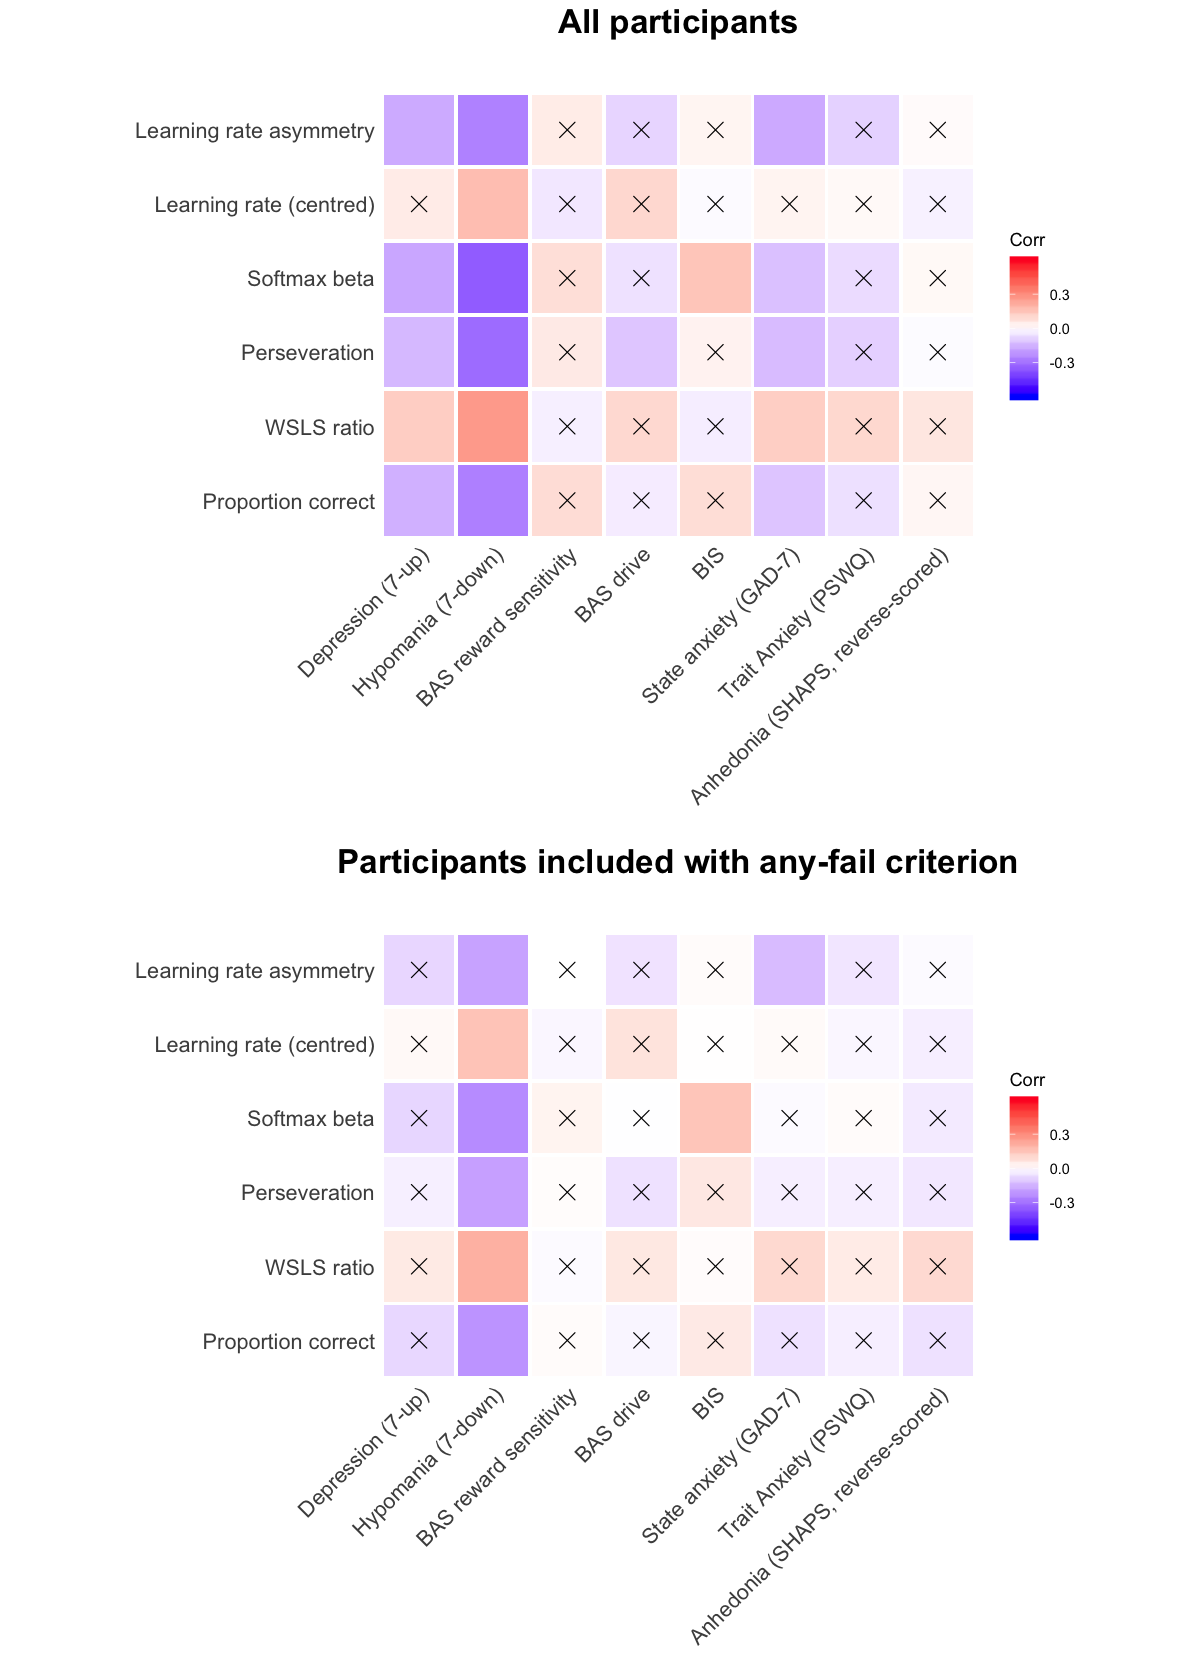

In [4]:
# plot correlations under different inclusion criteria
all_plot <- tile_plot(title="All participants\n", metrics, behav_measures, survey_data, survey_measures, include_ix=survey_data$n_infreq_fail >= 0 & behav_incl)
include_plot <- tile_plot(title="Participants included with any-fail criterion\n", metrics, behav_measures, survey_data, survey_measures, include_ix=survey_data$n_infreq_fail == 0 & behav_incl)

# set plot options
options(repr.plot.width=10, repr.plot.height=14)
grid.arrange(all_plot, include_plot, nrow=2)

## Correlations at various exclusion thresholds: depression and Softmax beta

In [5]:
# read utilities for calculating correlations at various exclusion thresholds
source(here("utilities", "plot_correlation.R"))

### With categorical cutoff

In [6]:
# make plots
full_sample_cat <- plot_corr_categorical_cutoff(survey_data, metrics, plot_title="Full sample")
mturk_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], plot_title="MTurk")
prolific_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], plot_title="Prolific")


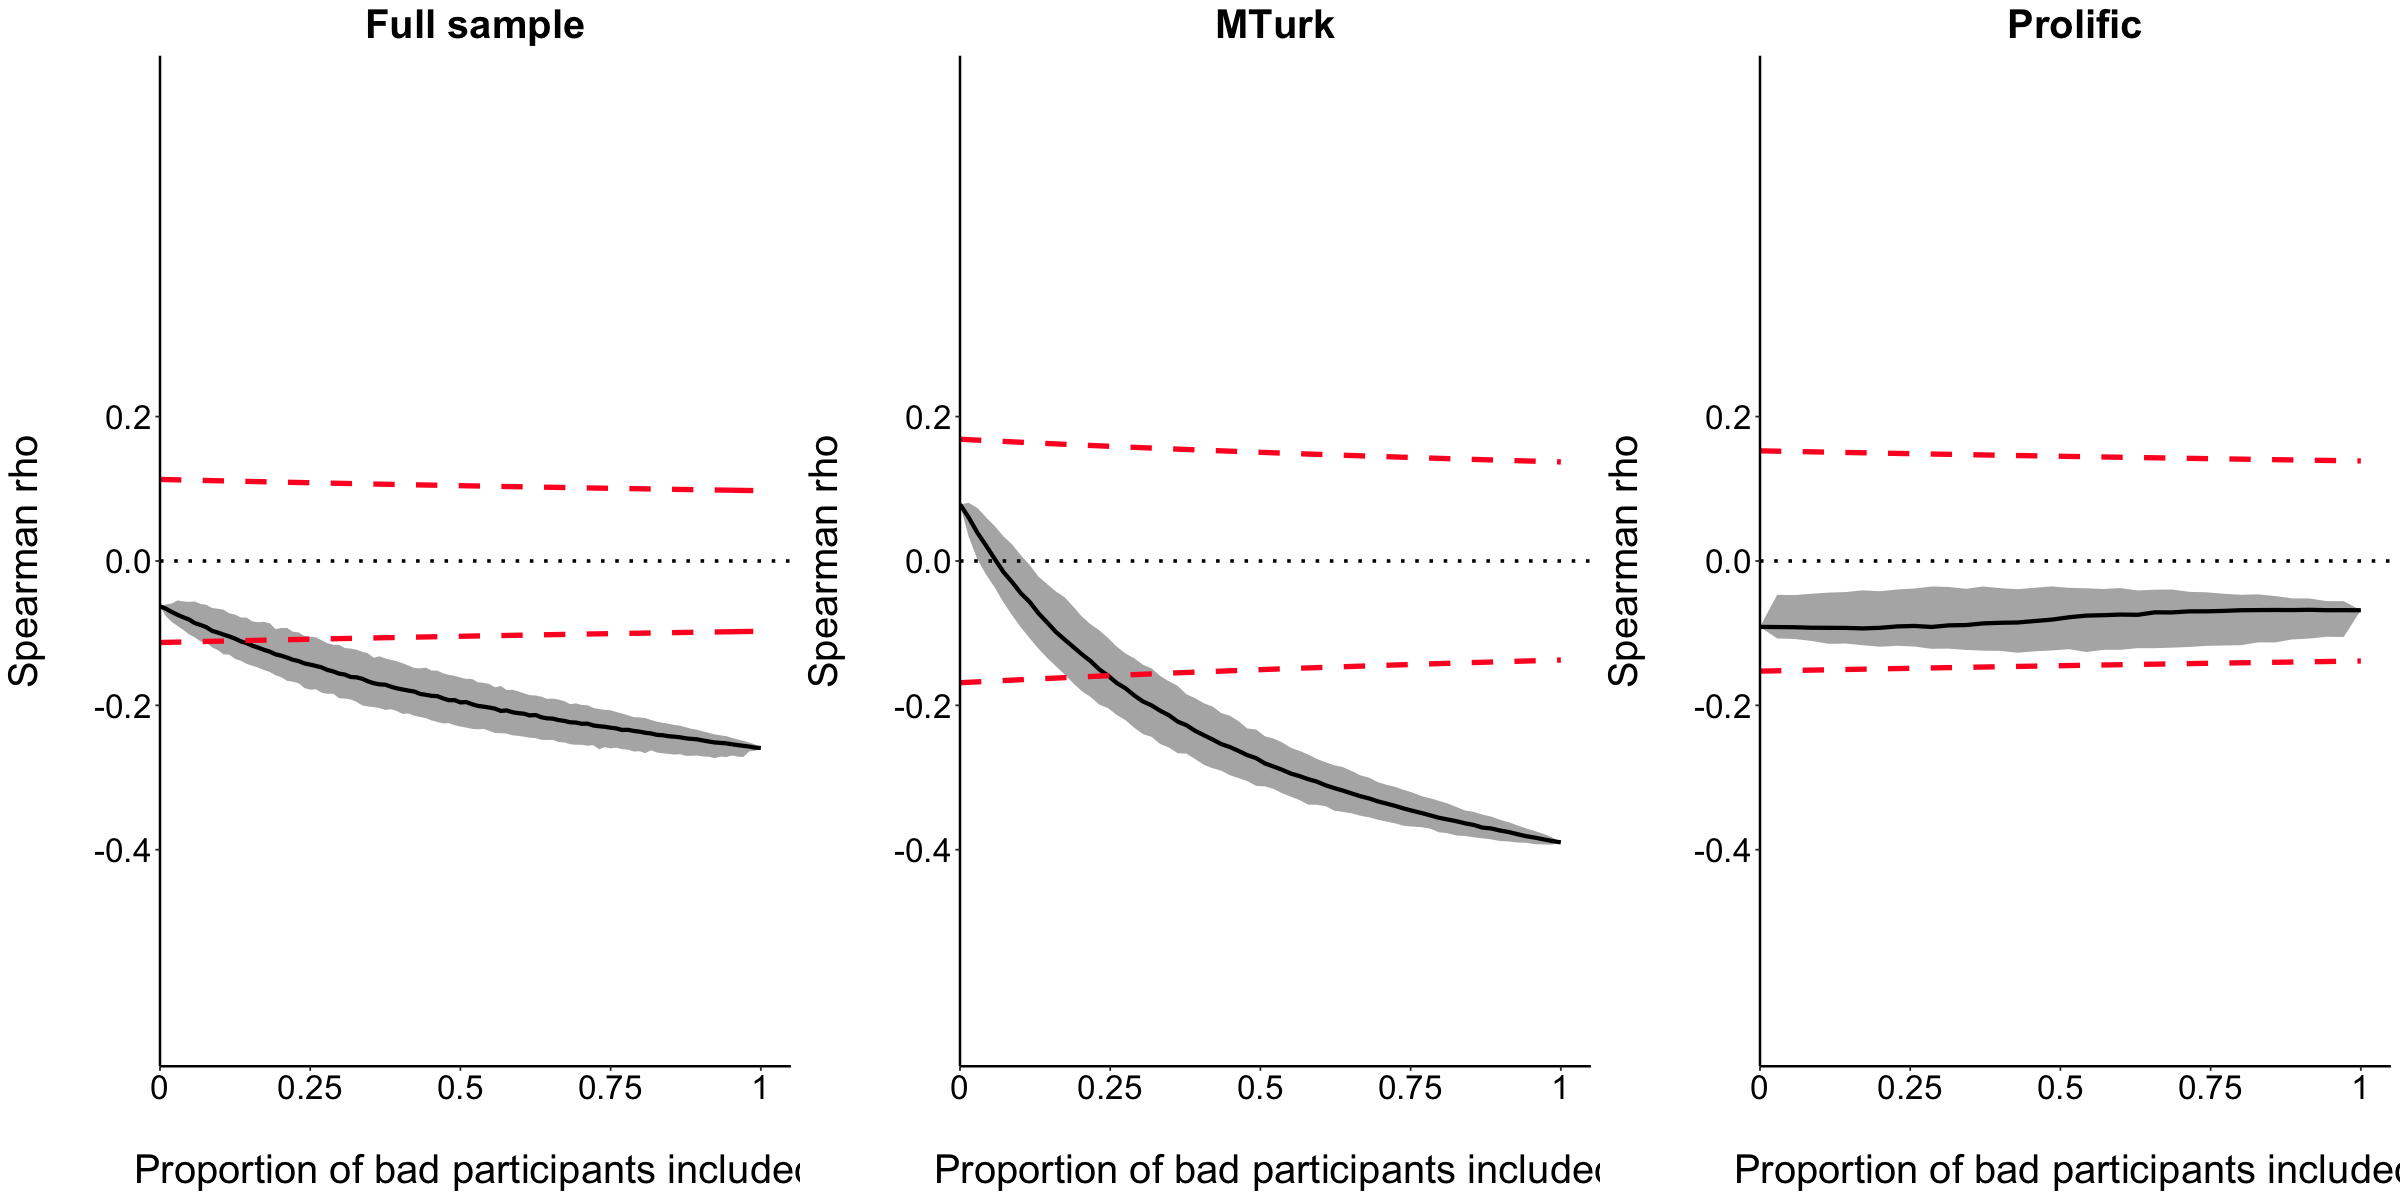

In [7]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_cat, mturk_cat, prolific_cat, nrow=1)


### With ordinal cutoff

In [8]:
# make plots
full_sample_ord <- plot_corr_ordinal_cutoff(survey_data, metrics, plot_title="Full sample")
mturk_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], plot_title="MTurk")
prolific_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], plot_title="Prolific")


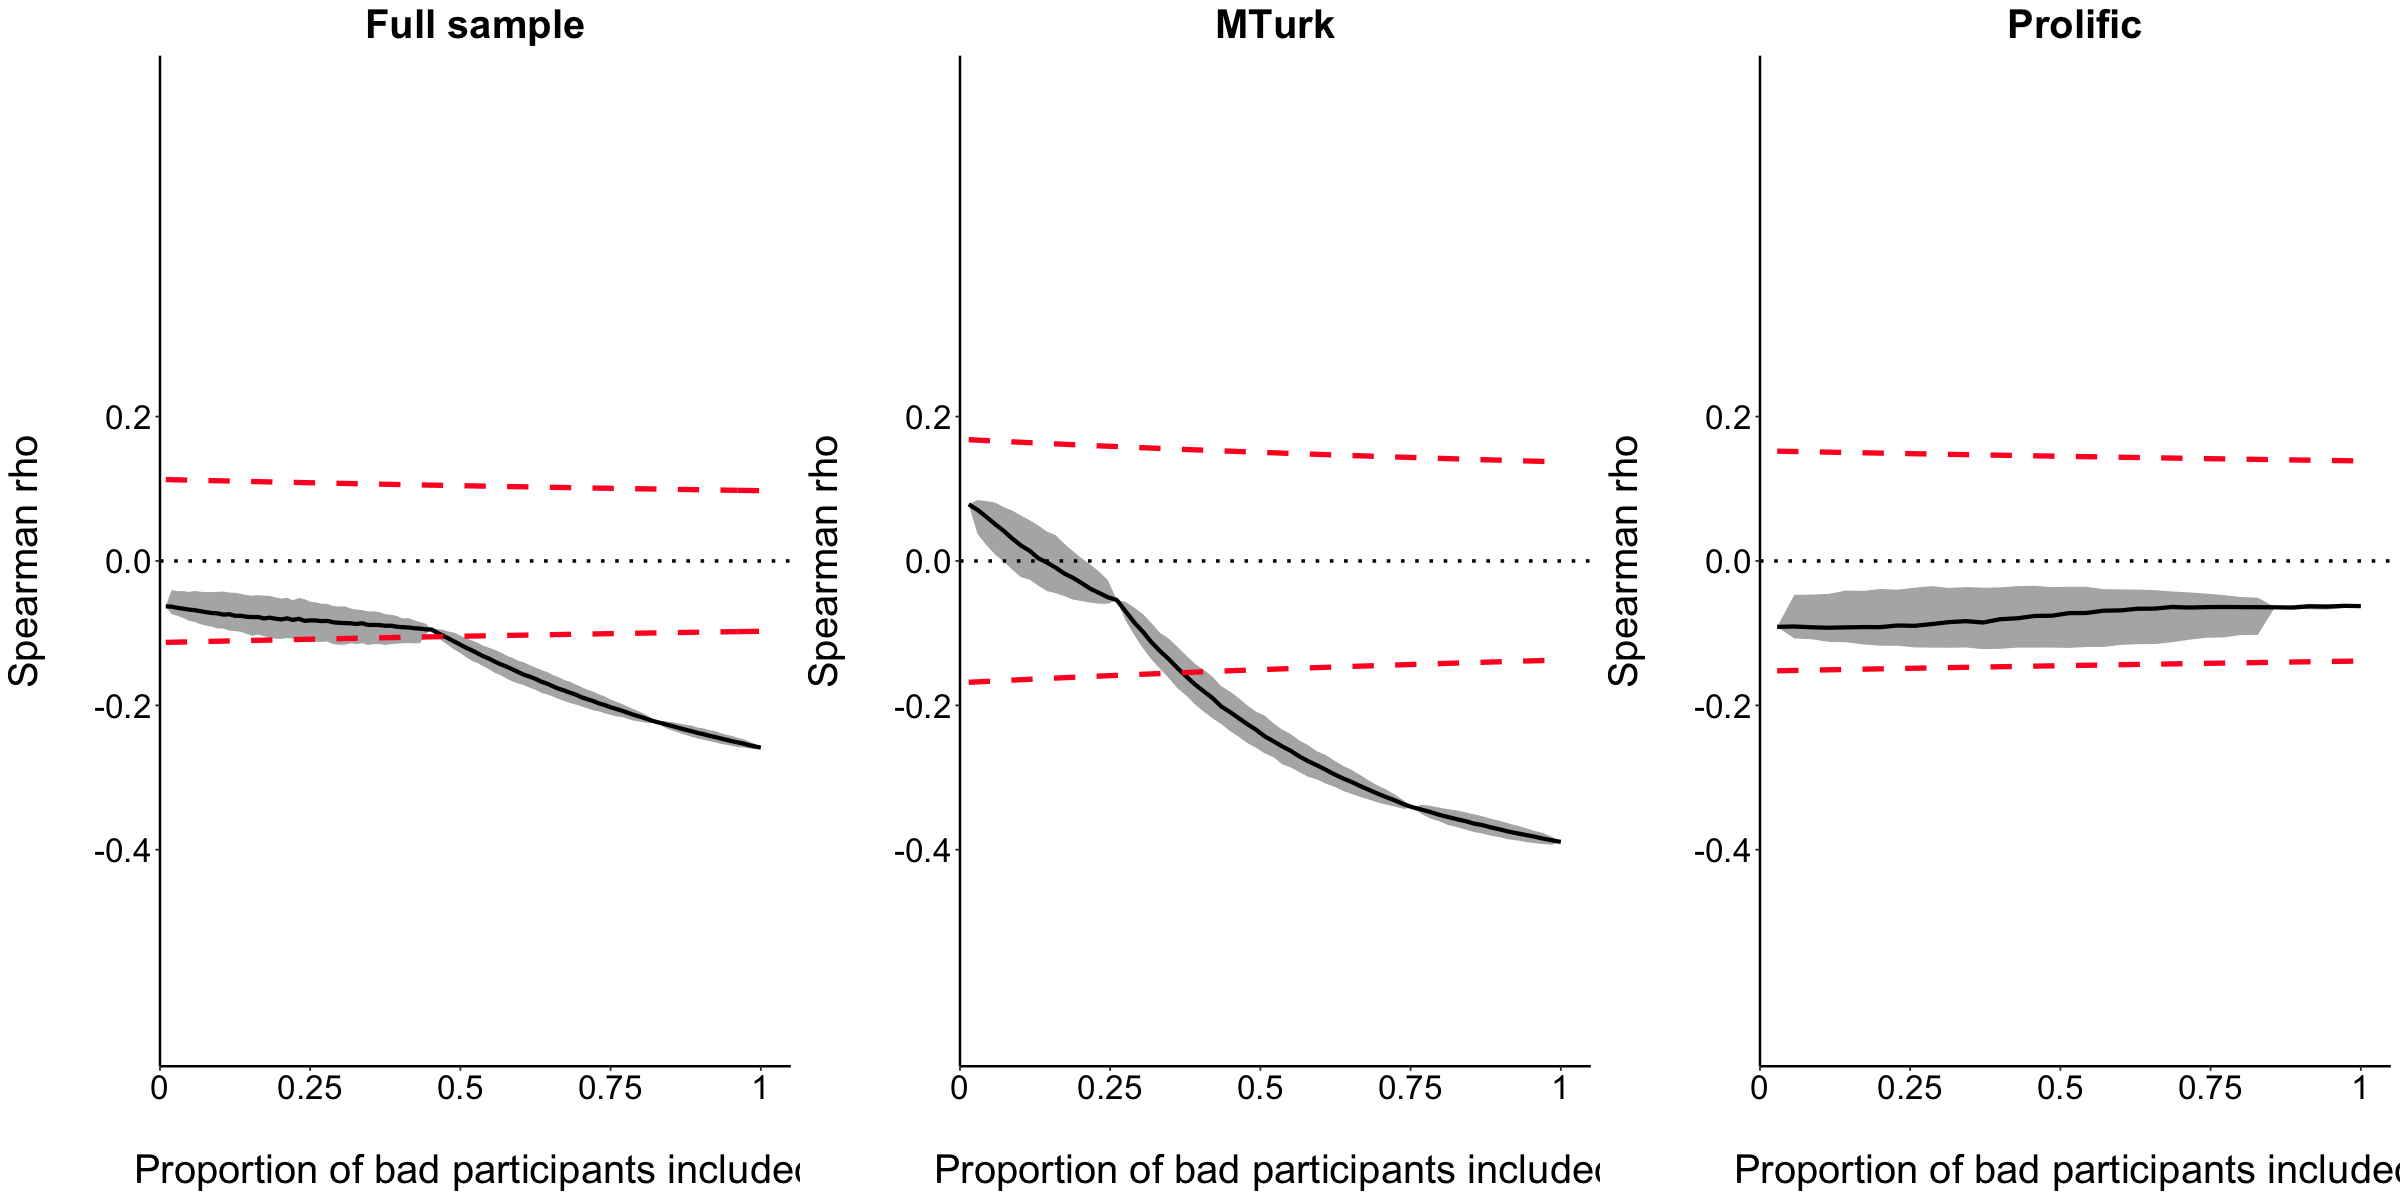

In [9]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_ord, mturk_ord, prolific_ord, nrow=1)


## Correlations at various exclusion thresholds: Anxiety and Softmax beta

### With categorical cutoff

In [10]:
# make plots
full_sample_cat <- plot_corr_categorical_cutoff(survey_data, metrics, survey_var="gad7", plot_title="Full sample")
mturk_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], survey_var="gad7", plot_title="MTurk")
prolific_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], survey_var="gad7", plot_title="Prolific")


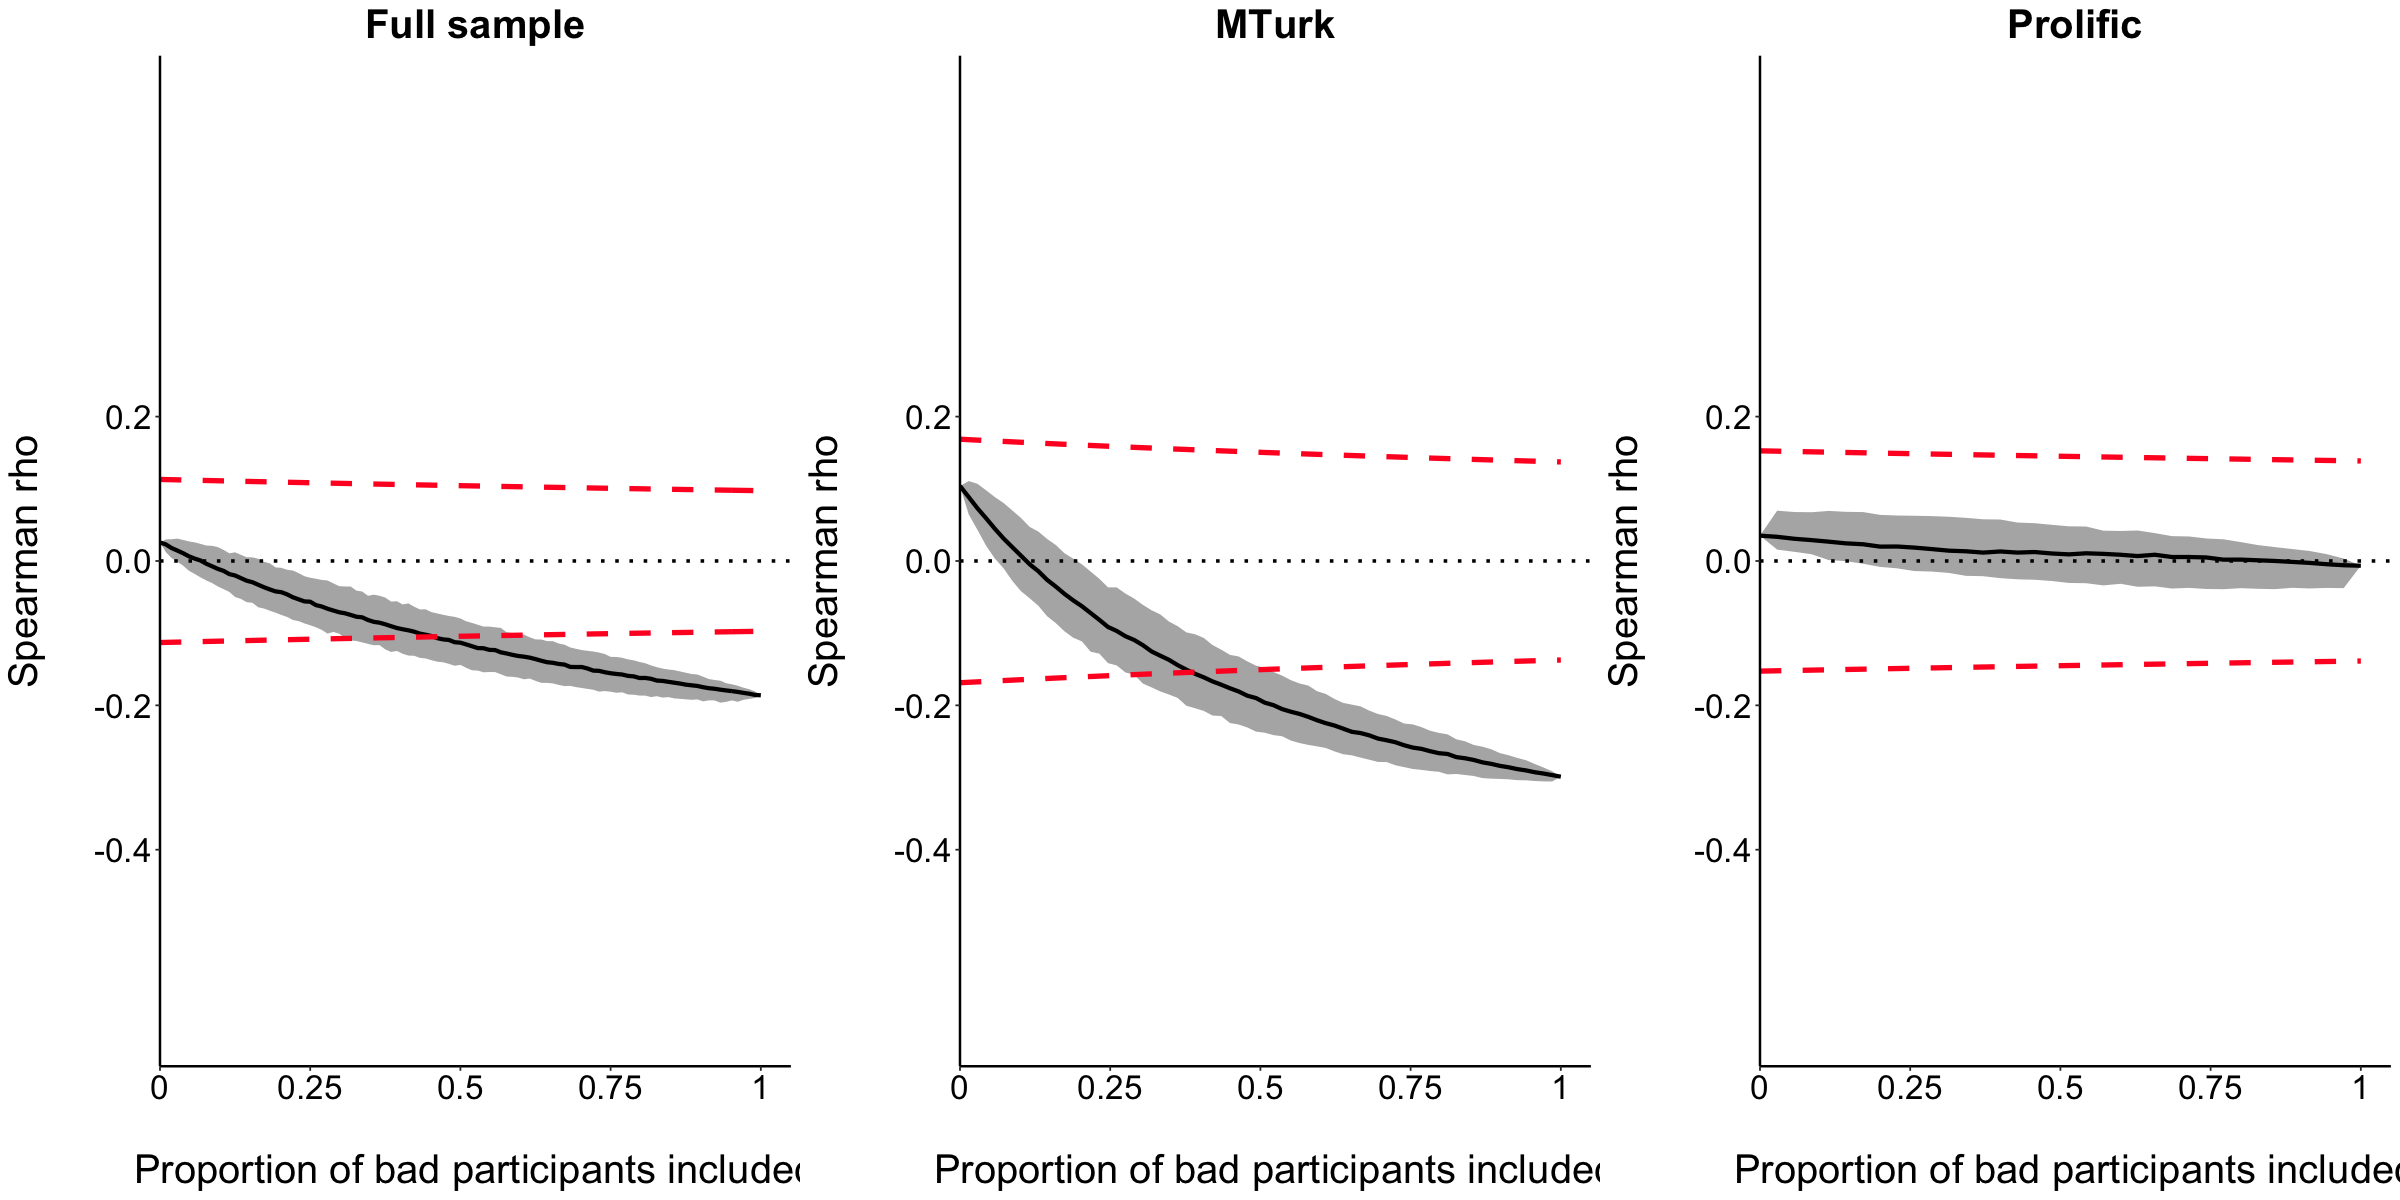

In [11]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_cat, mturk_cat, prolific_cat, nrow=1)


### With ordinal cutoff

In [12]:
# make plots
full_sample_ord <- plot_corr_ordinal_cutoff(survey_data, metrics, survey_var="gad7", plot_title="Full sample")
mturk_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], survey_var="gad7", plot_title="MTurk")
prolific_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], survey_var="gad7", plot_title="Prolific")


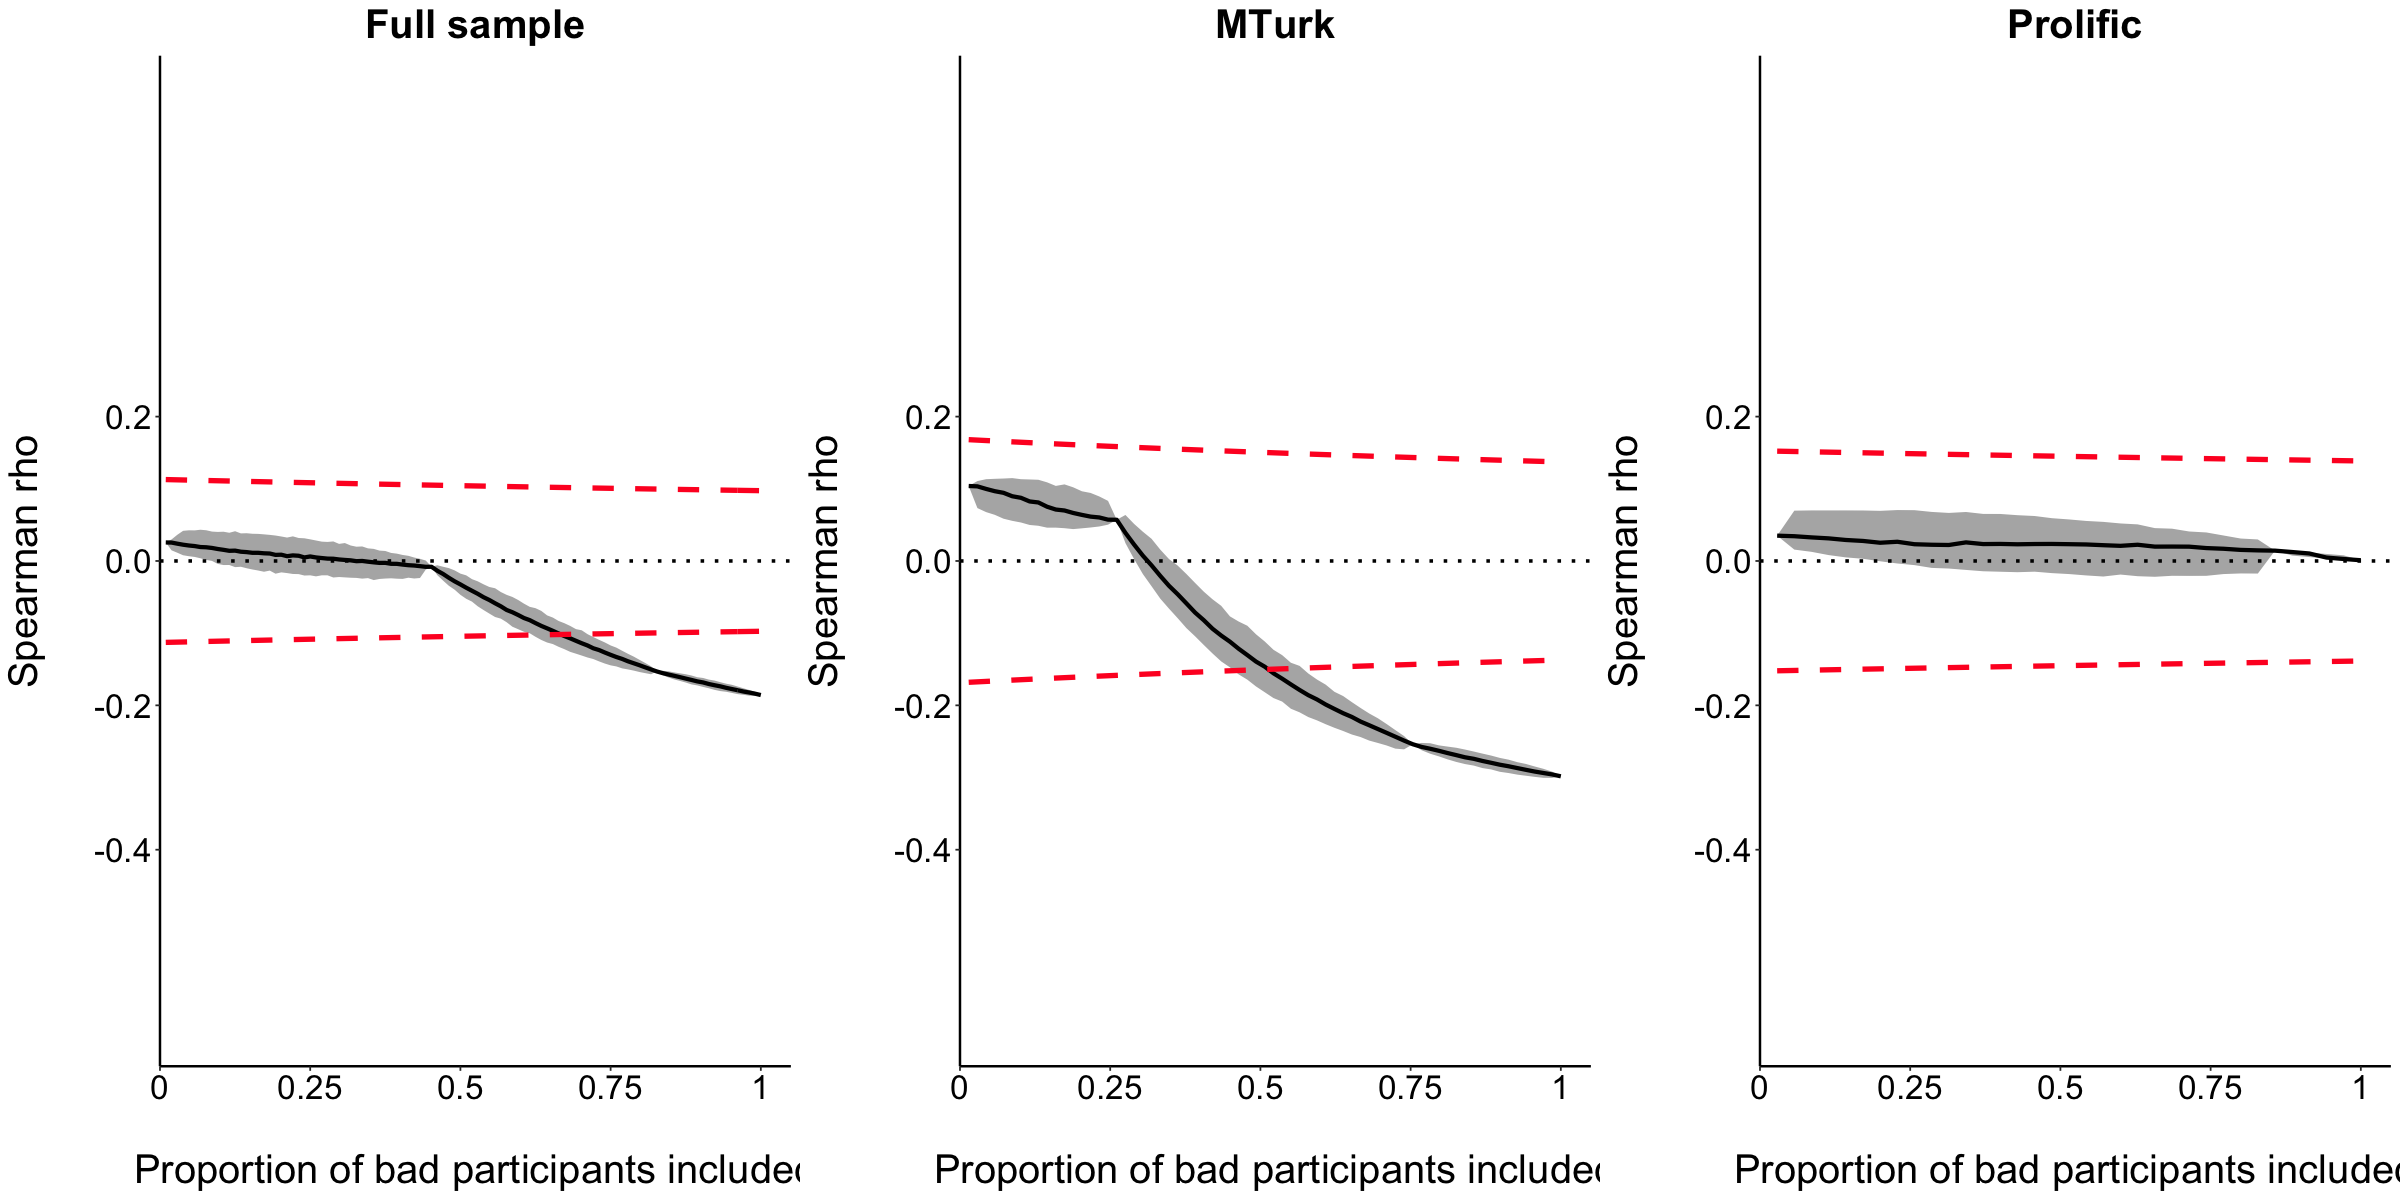

In [13]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_ord, mturk_ord, prolific_ord, nrow=1)


## Correlations at various exclusion thresholds: Hypomania and Softmax beta

In [14]:
# make plots
full_sample_cat <- plot_corr_categorical_cutoff(survey_data, metrics, survey_var="seven_up", plot_title="Full sample")
mturk_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], survey_var="seven_up", plot_title="MTurk")
prolific_cat <- plot_corr_categorical_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], survey_var="seven_up", plot_title="Prolific")


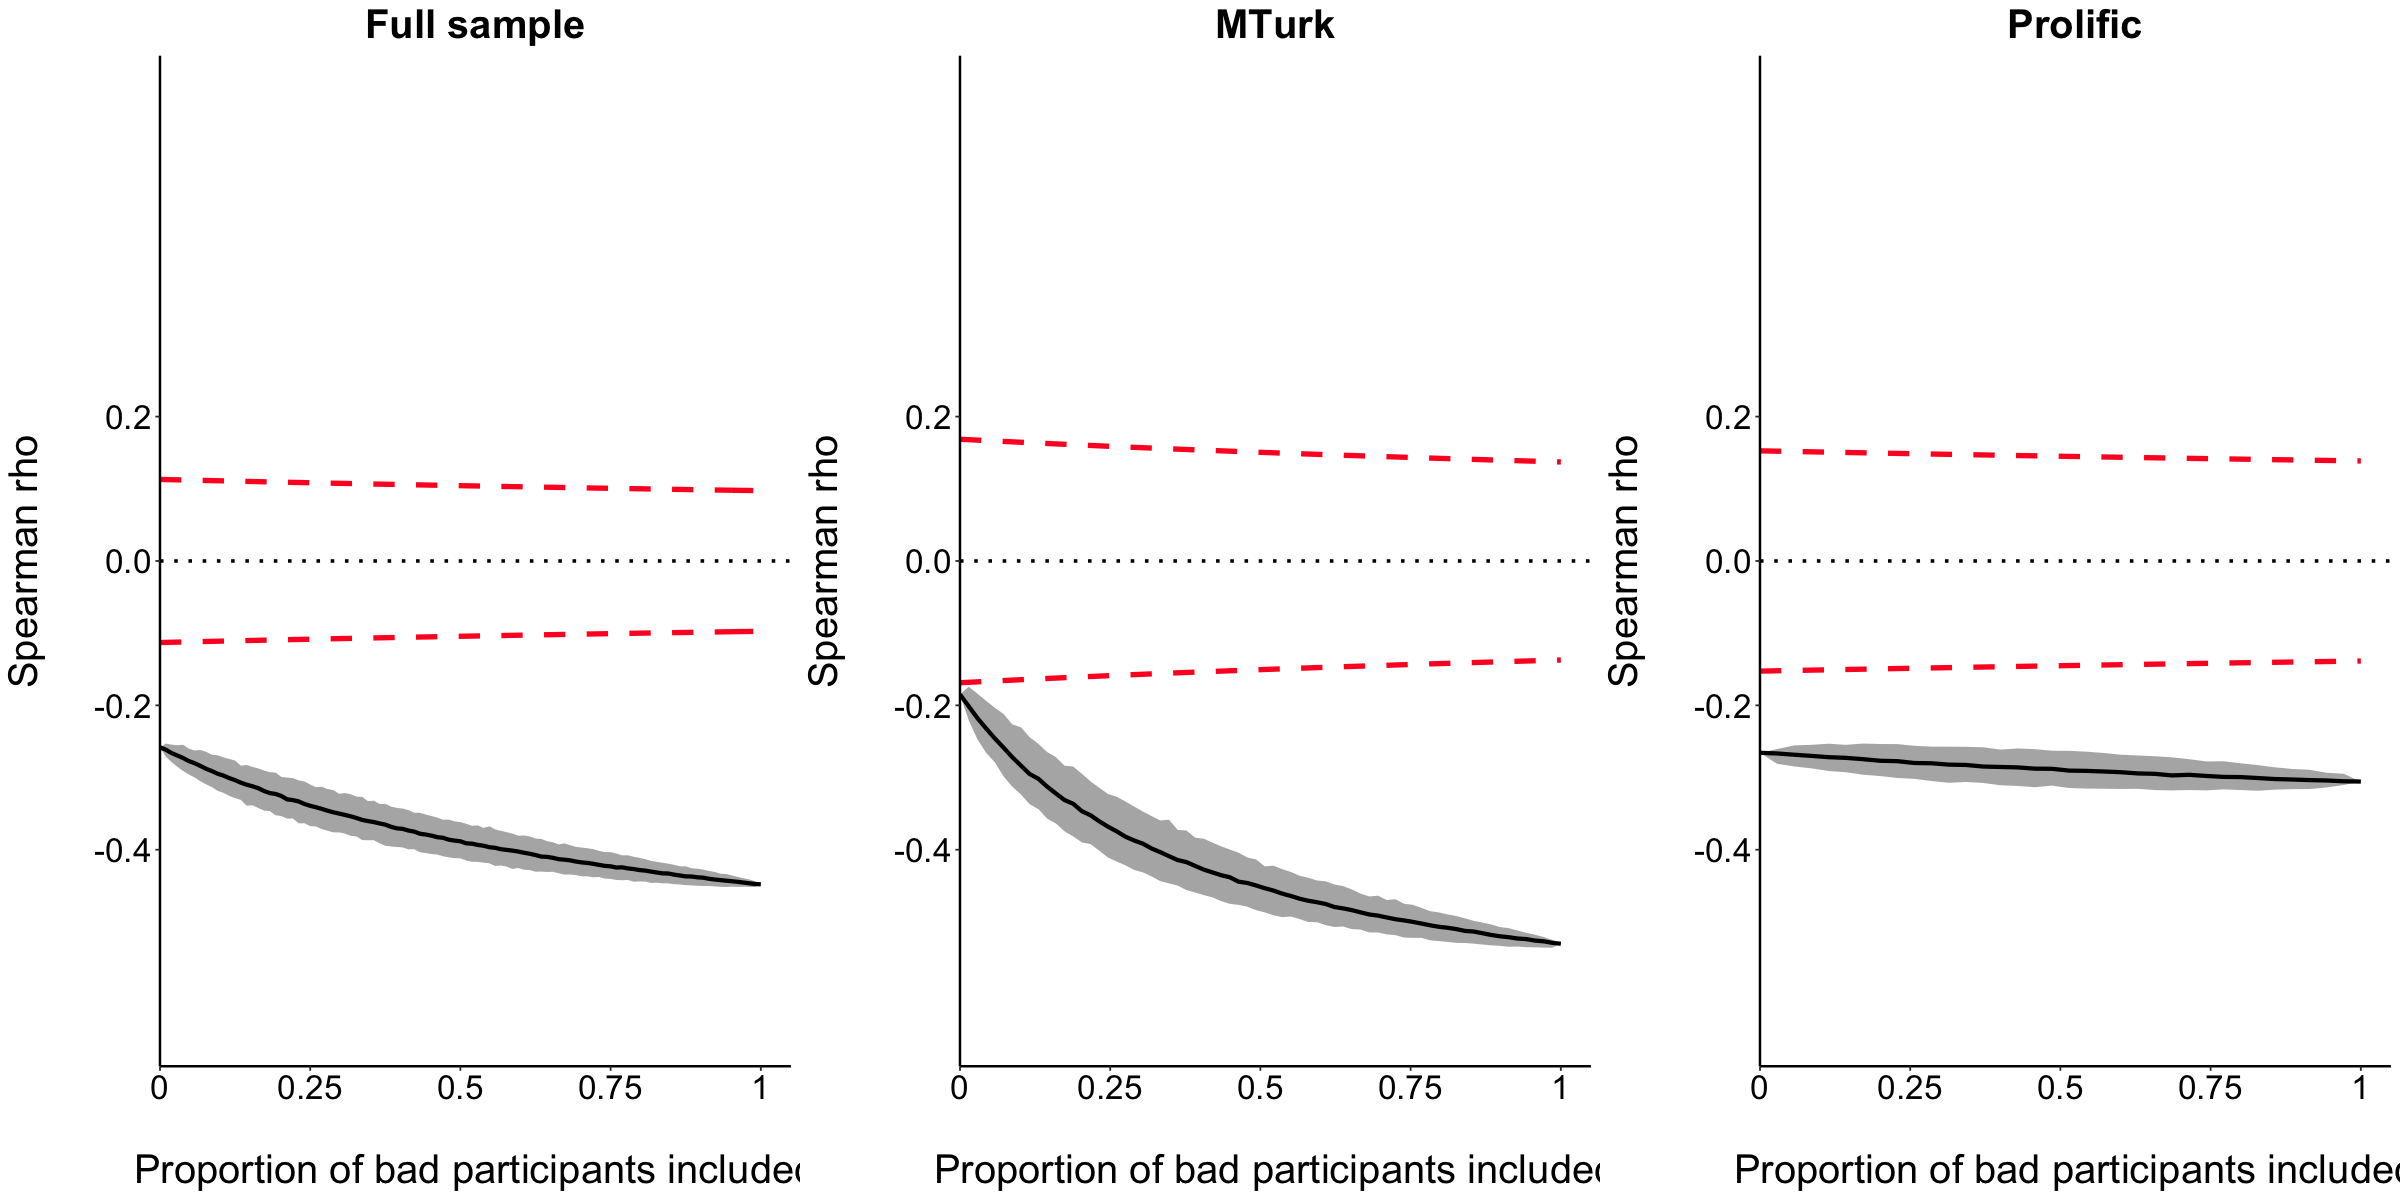

In [15]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_cat, mturk_cat, prolific_cat, nrow=1)


### With ordinal cutoff

In [16]:
# make plots
full_sample_ord <- plot_corr_ordinal_cutoff(survey_data, metrics, survey_var="seven_up", plot_title="Full sample")
mturk_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "mturk",], metrics[survey_data$platform == "mturk",], survey_var="seven_up", plot_title="MTurk")
prolific_ord <- plot_corr_ordinal_cutoff(survey_data[survey_data$platform == "prolific",], metrics[survey_data$platform == "prolific",], survey_var="seven_up", plot_title="Prolific")


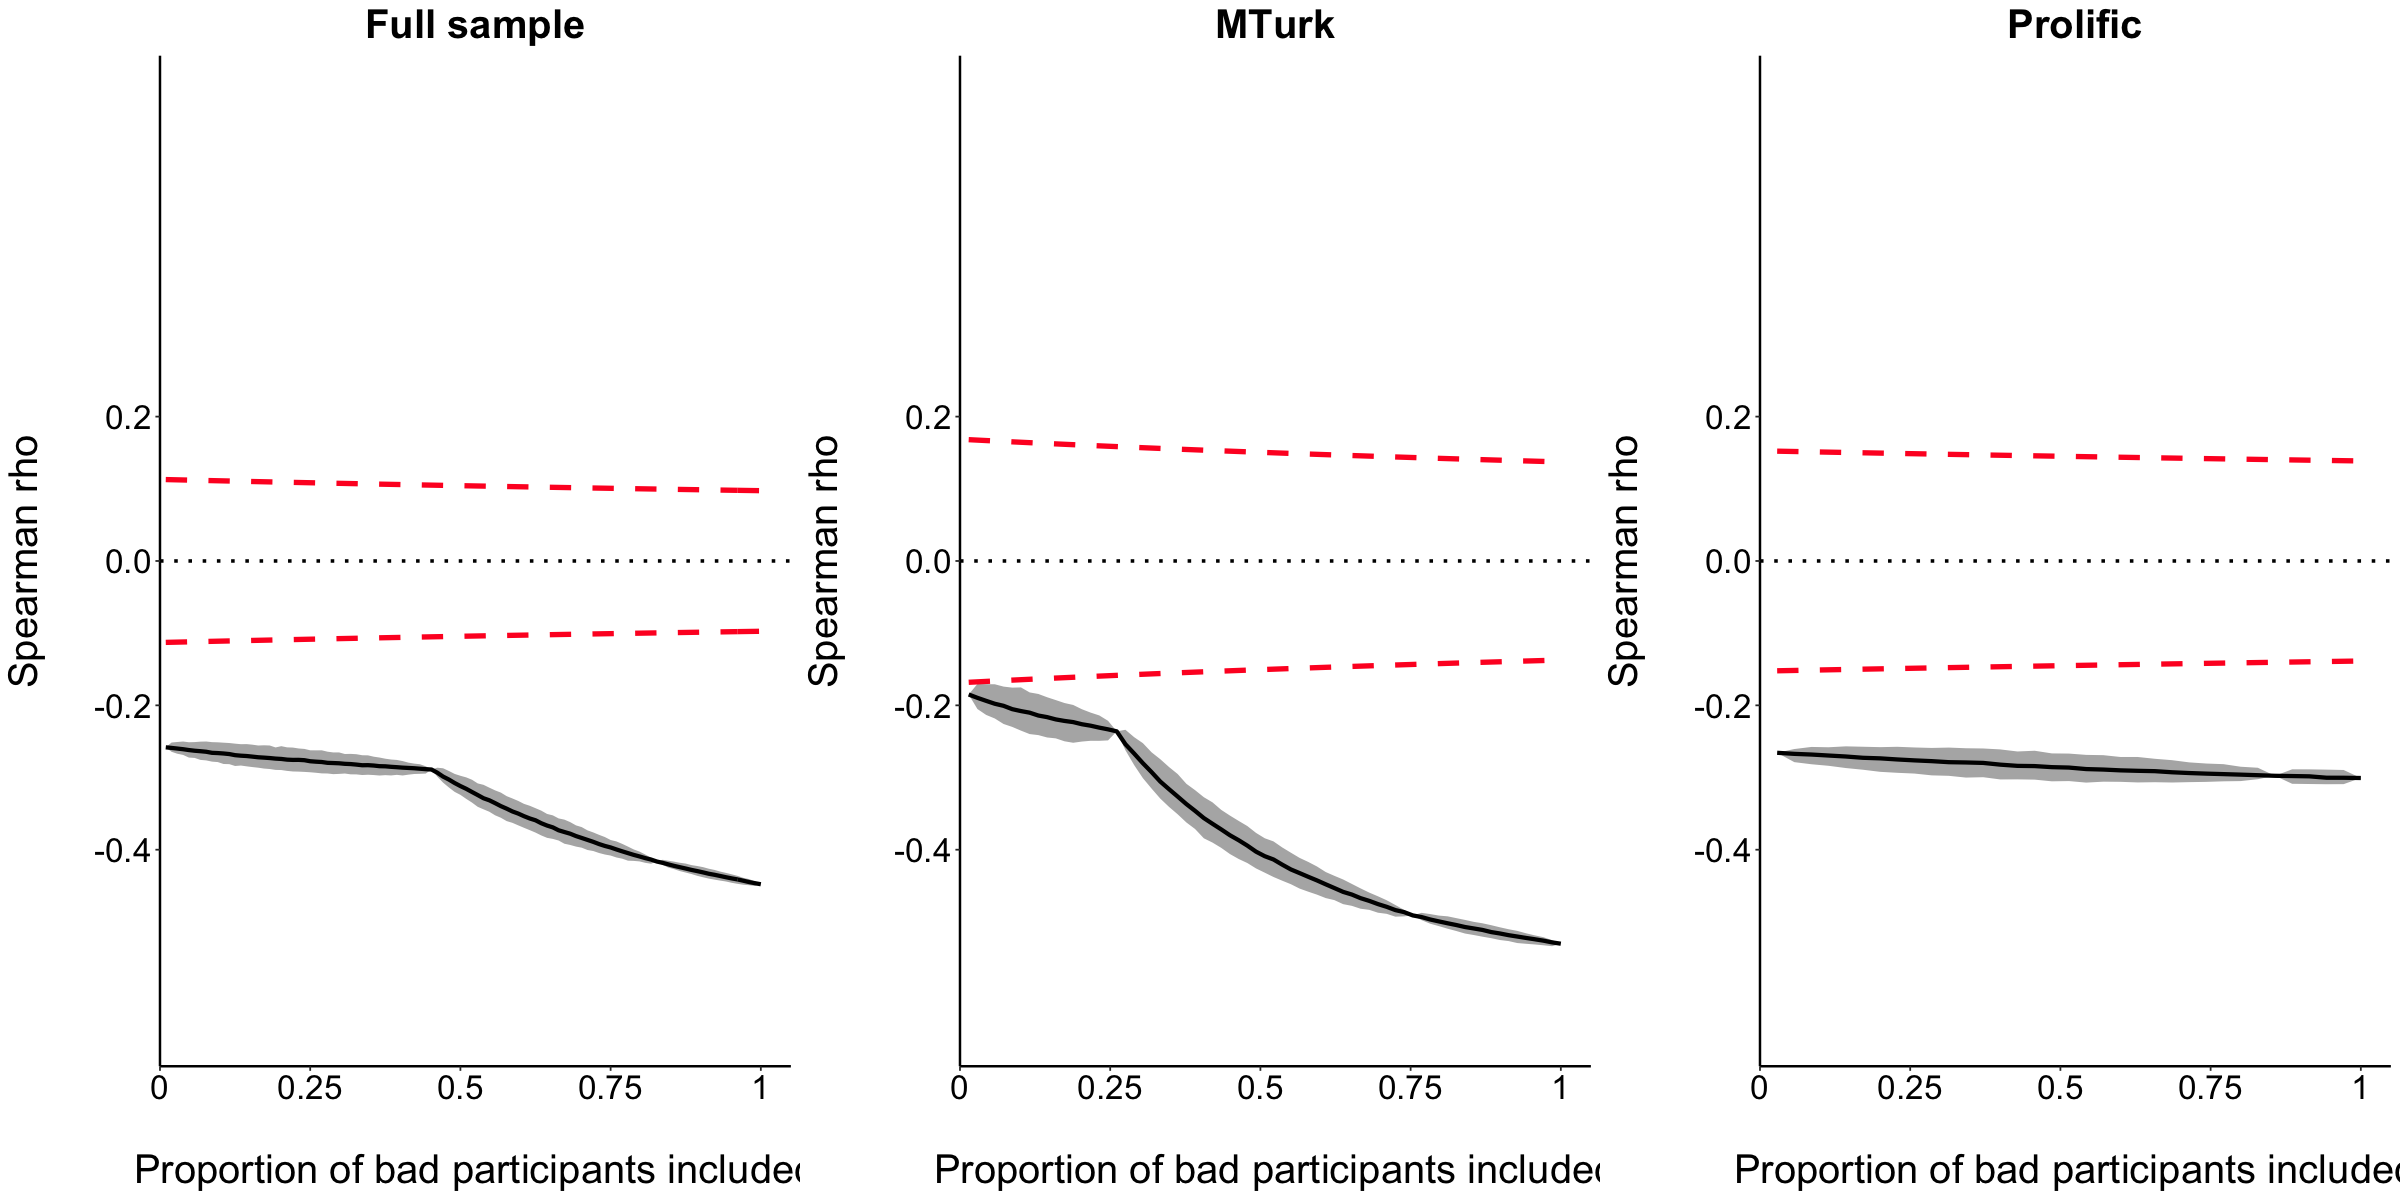

In [17]:
# display plots
options(repr.plot.width=20, repr.plot.height=10)
grid.arrange(full_sample_ord, mturk_ord, prolific_ord, nrow=1)


## Dig into hypomania correlations further

In [18]:
# set ggplot theme
theme_set(theme_gray() + 
              theme(  axis.line = element_line(colour="black"),
                      axis.text=element_text(size=20),
                      axis.title=element_text(size=24),
                      plot.title=element_text(size=28, face="bold", hjust=0.5),
                      panel.border=element_blank(),
                      panel.background=element_blank(),
                      panel.grid=element_blank()))

In [19]:
# specify inclusion criterion
include_ix <-  metrics$prop_correct >= (qbinom(c(0.95), size=90, prob=(1/3)) / 90) & survey_data$n_infreq_fail == 0

# plot associations
hypomania_data <- data.frame(

    "id" = survey_data[include_ix, "subject"],
    "hypomania" = survey_data[include_ix, "seven_up"],
    "prop_correct" = metrics[include_ix, "prop_correct"],
    "asymm_eta" = metrics[include_ix, "RW_asymm_eta"],
    "asymm_kappa" = metrics[include_ix, "RW_asymm_kappa"],
    "asymm_beta" = metrics[include_ix, "RW_asymm_beta"],
    "WSLS" = metrics[include_ix, "WSLS_ratio"],
    "perseveration" = metrics[include_ix, "mean_perseveration"]
    
)


p_prop_correct <- ggplot(data=hypomania_data, aes(x=hypomania, y=prop_correct)) +
                    geom_point(position=position_jitter(width=0.1), size=3, colour="gray30") +
                    geom_smooth(method="lm", colour="black", size=2) +
                    geom_hline(yintercept=1/3, linetype="dashed", size=2, colour="gray50") +
                    scale_x_continuous(name="\nGBI hypomania", limits=c(-0.5, 16), expand=c(0,0)) +
                    scale_y_continuous(name="Proportion correct\n", limits=c(0.3, 1)) +
                    ggtitle("Proportion correct")

p_WSLS <- ggplot(data=hypomania_data, aes(x=hypomania, y=WSLS)) +
                    geom_point(position=position_jitter(width=0.1), size=3, colour="gray30") +
                    geom_smooth(method="lm", colour="black", size=2) +
                    scale_x_continuous(name="\nGBI hypomania", limits=c(-0.5, 16), expand=c(0,0)) +
                    scale_y_continuous(name="WSLS ratio\n", limits=c(0, 1)) +
                    ggtitle("WSLS")

p_perseveration <- ggplot(data=hypomania_data, aes(x=hypomania, y=perseveration)) +
                    geom_point(position=position_jitter(width=0.1), size=3, colour="gray30") +
                    geom_smooth(method="lm", colour="black", size=2) +
                    scale_x_continuous(name="\nGBI hypomania", limits=c(-0.5, 16), expand=c(0,0)) +
                    scale_y_continuous(name="Proportion correct\n", limits=c(0, 10)) +
                    ggtitle("Perseveration")
                    
p_asymm_eta <- ggplot(data=hypomania_data, aes(x=hypomania, y=asymm_eta)) +
                    geom_point(position=position_jitter(width=0.1), size=3, colour="gray30") +
                    geom_smooth(method="lm", colour="black", size=2) +
                    geom_hline(yintercept=0, linetype="dashed", size=2, colour="gray50") +
                    scale_x_continuous(name="\nGBI hypomania", limits=c(-0.5, 16), expand=c(0,0)) +
                    scale_y_continuous(name="\nLearning rate\n(untransformed)\n", limits=c(-3, 3)) +
                    ggtitle("Learning rate")

p_asymm_kappa <- ggplot(data=hypomania_data, aes(x=hypomania, y=asymm_kappa)) +
                    geom_point(position=position_jitter(width=0.1), size=3, colour="gray30") +
                    geom_smooth(method="lm", colour="black", size=2) +
                    geom_hline(yintercept=0, linetype="dashed", size=2, colour="gray50") +
                    scale_x_continuous(name="\nGBI hypomania", limits=c(-0.5, 16), expand=c(0,0)) +
                    scale_y_continuous(name="\nLearning rate asymmetry\n(untransformed)\n", limits=c(-3, 3)) +
                    ggtitle("Learning rate asymmetry")


p_asymm_beta <- ggplot(data=hypomania_data, aes(x=hypomania, y=asymm_kappa)) +
                    geom_point(position=position_jitter(width=0.1), size=3, colour="gray30") +
                    geom_smooth(method="lm", colour="black", size=2) +
                    geom_hline(yintercept=0, linetype="dashed", size=2, colour="gray50") +
                    scale_x_continuous(name="\nGBI hypomania", limits=c(-0.5, 16), expand=c(0,0)) +
                    scale_y_continuous(name="\nSoftmax inverse temperature\n(untransformed)\n", limits=c(-4, 4)) +
                    ggtitle("Softmax beta")

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


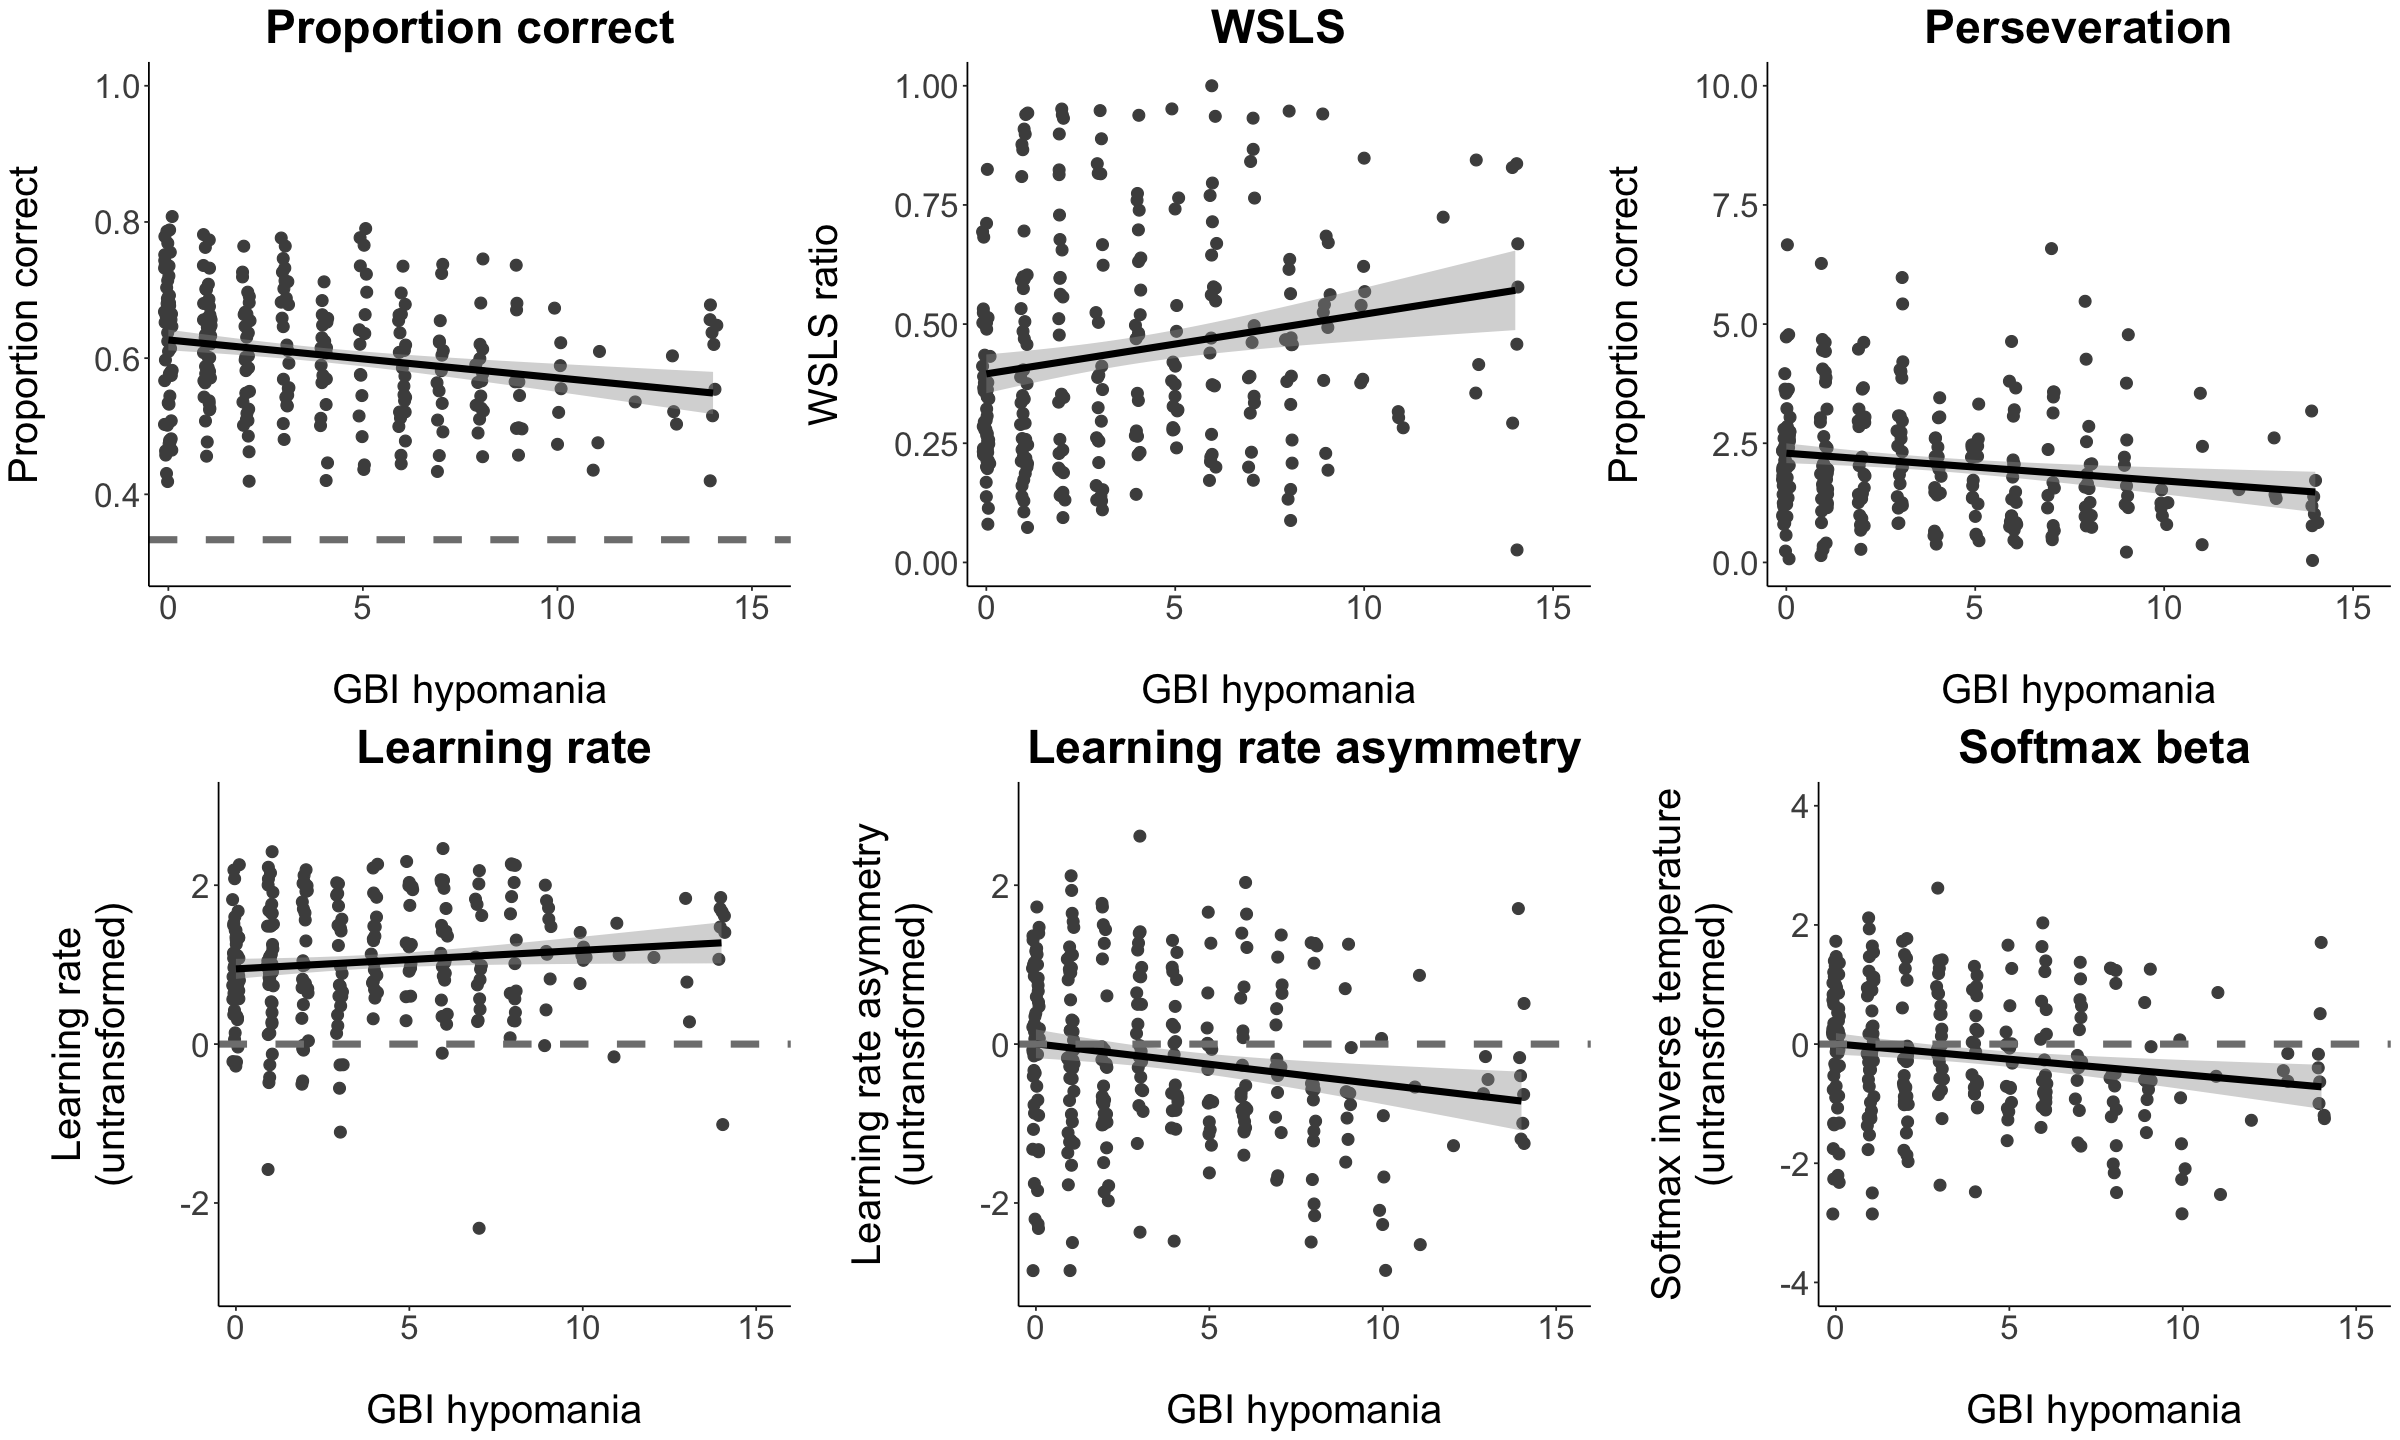

In [20]:
options(repr.plot.width=20, repr.plot.height=12)
grid.arrange(p_prop_correct, p_WSLS, p_perseveration, p_asymm_eta, p_asymm_kappa, p_asymm_beta, nrow=2)

In [21]:
# some functions for permutation tests and bootstraps
spearman_perm_test <- function(x, y, n_perm=100000){
    
    # calculate observed correlation
    obs_corr <- cor.test(x, y, type="spearman")$estimate
    
    # container for correlations
    perm_corr <- replicate(n=n_perm, expr=cor.test(x, sample(y, size=length(y), replace=FALSE), type="spearman")$estimate)
    
    # calculate 2-tailed probability under permutation distribution
    perm_p_val <- sum(abs(perm_corr >= abs(obs_corr))) / n_perm

    # return values
    return(list("rho" = obs_corr,
                "perm_rho" = perm_corr,
                "p" = perm_p_val))
                      
}

spearman_bootstrap <- function(x, y, n_boot=10000){
    
    # calculate observed correlation
    obs_corr <- cor.test(x, y, type="spearman")$estimate
    
    # container for correlations
    boot_corr <- rep(NA, times=n_boot)
    
    for (i in 1:n_boot){
        sample_indices <- sample(length(x), replace=T)
        boot_corr[i] <- cor.test(x[sample_indices], y[sample_indices], type="spearman")$estimate
    }
    
    # return values
    return(list("rho" = obs_corr,
                "boot_rho" = boot_corr))
                      
}


In [22]:
# # permutation test, if desired
# set.seed(1234)
# hyp_cor <- spearman_perm_test(hypomania_data$hypomania, hypomania_data$prop_correct)
# hyp_eta <- spearman_perm_test(hypomania_data$hypomania, hypomania_data$asymm_eta)
# hyp_kap <- spearman_perm_test(hypomania_data$hypomania, hypomania_data$asymm_kappa)
# cor_eta <- spearman_perm_test(hypomania_data$prop_correct, hypomania_data$asymm_eta)
# cor_kap <- spearman_perm_test(hypomania_data$prop_correct, hypomania_data$asymm_kappa)
# eta_kap <- spearman_perm_test(hypomania_data$asymm_eta, hypomania_data$asymm_kappa)

In [23]:
# bootstrap correlation estimates
set.seed(1234)
hyp_cor <- spearman_bootstrap(hypomania_data$hypomania, hypomania_data$prop_correct)
hyp_WSLS <- spearman_bootstrap(hypomania_data$hypomania, hypomania_data$WSLS)
hyp_persev <- spearman_bootstrap(hypomania_data$hypomania, hypomania_data$perseveration)
hyp_eta <- spearman_bootstrap(hypomania_data$hypomania, hypomania_data$asymm_eta)
hyp_kap <- spearman_bootstrap(hypomania_data$hypomania, hypomania_data$asymm_kappa)
hyp_beta <- spearman_bootstrap(hypomania_data$hypomania, hypomania_data$asymm_beta)



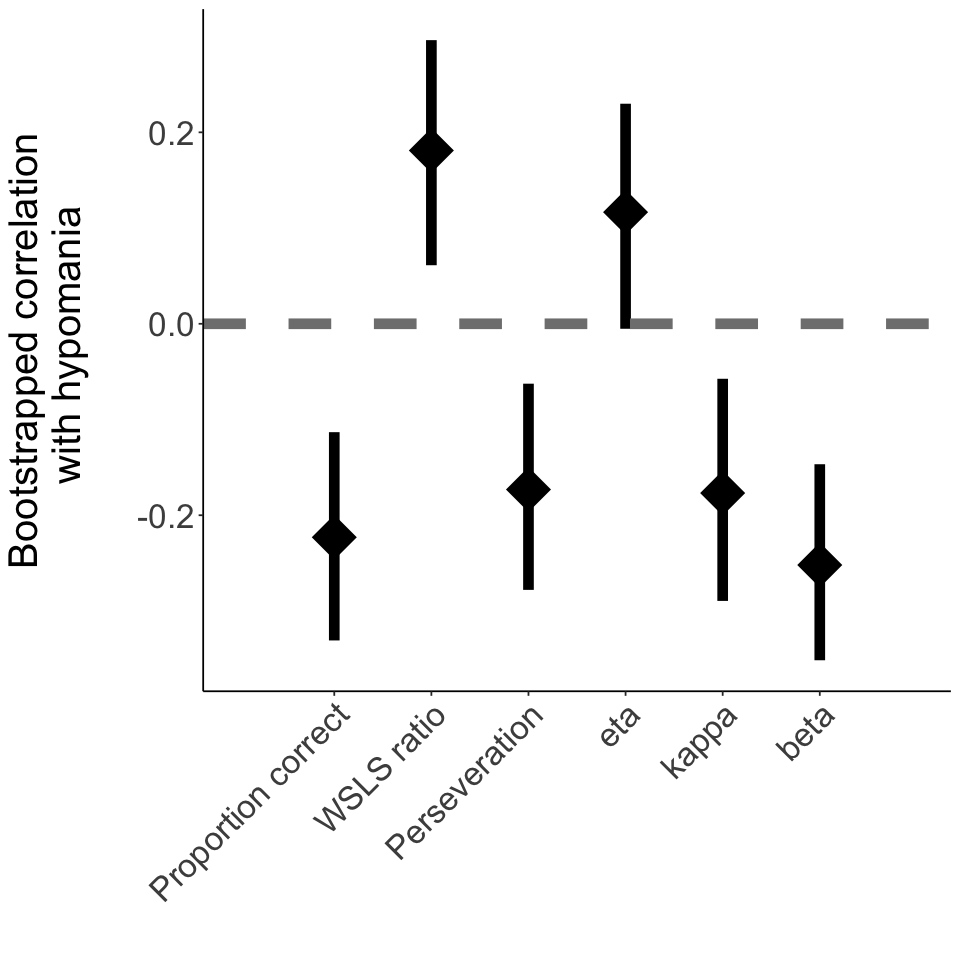

In [24]:
all_boot <- cbind(hyp_cor$boot_rho,hyp_WSLS$boot_rho,hyp_persev$boot_rho,hyp_eta$boot_rho,hyp_kap$boot_rho,hyp_beta$boot_rho)

boot_plot_frame <- data.frame(

    "median_rho" <- apply(all_boot, MARGIN=2, FUN=median),
    "lower_95ci" <- apply(all_boot, MARGIN=2, FUN=quantile, 0.025),
    "upper_95ci" <- apply(all_boot, MARGIN=2, FUN=quantile, 0.975)
)

options(repr.plot.width=8, repr.plot.height=8)
ggplot(data=boot_plot_frame, aes(x=c(1:6), y=median_rho, ymin=lower_95ci, ymax=upper_95ci)) +
                    geom_pointrange(size=3, shape=18) +
                    geom_hline(yintercept=0, linetype="dashed", colour="grey50", size=3) +
                    ylab("Bootstrapped correlation\n with hypomania\n") +
                    scale_x_continuous(name="", limits=c(0,7), breaks=1:6, labels=c("Proportion correct", "WSLS ratio", "Perseveration", "eta", "kappa", "beta")) +
                    theme(axis.text.x = element_text(angle=45, hjust=1))


What if we exclude extreme values of hypomania (10 or greater)?

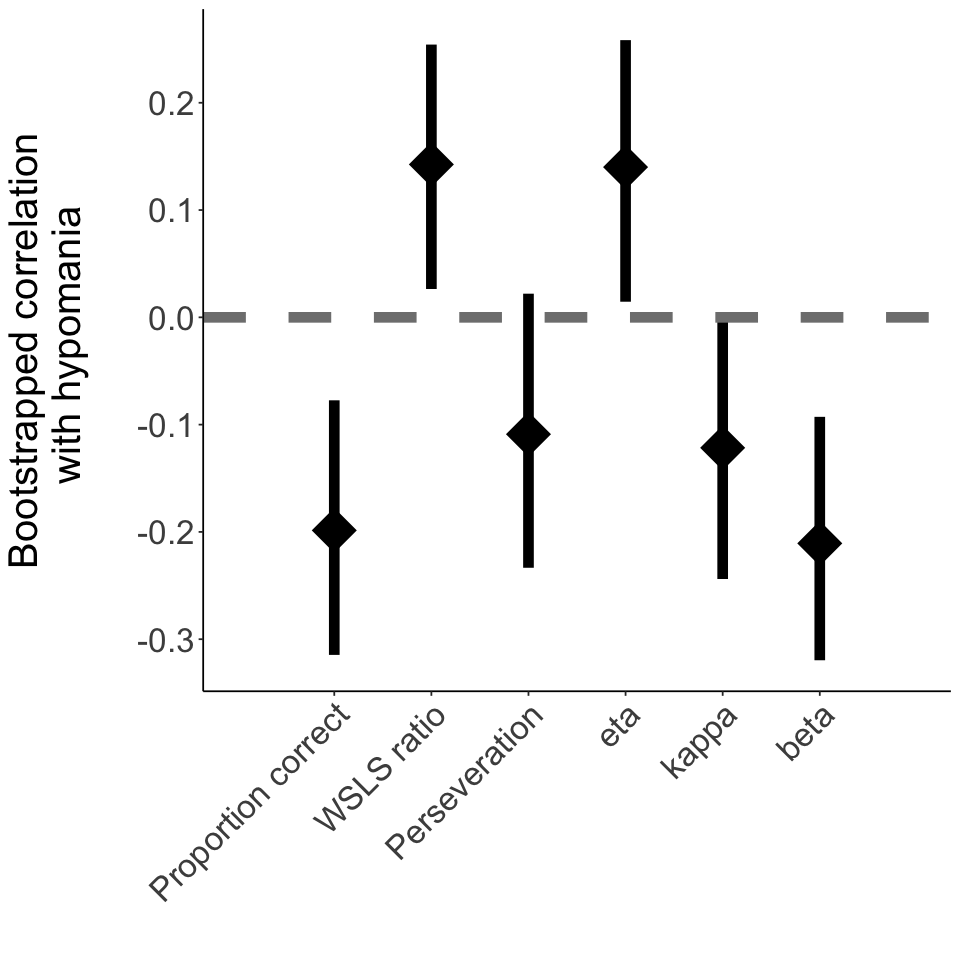

In [25]:
# is it just the most extreme values?
trimmed_hypomania_data <- subset(hypomania_data, hypomania_data$hypomania < 10)

# bootstrap correlation estimates
set.seed(1234)
hyp_cor <- spearman_bootstrap(trimmed_hypomania_data$hypomania, trimmed_hypomania_data$prop_correct)
hyp_WSLS <- spearman_bootstrap(trimmed_hypomania_data$hypomania, trimmed_hypomania_data$WSLS)
hyp_persev <- spearman_bootstrap(trimmed_hypomania_data$hypomania, trimmed_hypomania_data$perseveration)
hyp_eta <- spearman_bootstrap(trimmed_hypomania_data$hypomania, trimmed_hypomania_data$asymm_eta)
hyp_kap <- spearman_bootstrap(trimmed_hypomania_data$hypomania, trimmed_hypomania_data$asymm_kappa)
hyp_beta <- spearman_bootstrap(trimmed_hypomania_data$hypomania, trimmed_hypomania_data$asymm_beta)

all_boot <- cbind(hyp_cor$boot_rho,hyp_WSLS$boot_rho,hyp_persev$boot_rho,hyp_eta$boot_rho,hyp_kap$boot_rho,hyp_beta$boot_rho)

boot_plot_frame <- data.frame(

    "median_rho" <- apply(all_boot, MARGIN=2, FUN=median),
    "lower_95ci" <- apply(all_boot, MARGIN=2, FUN=quantile, 0.025),
    "upper_95ci" <- apply(all_boot, MARGIN=2, FUN=quantile, 0.975)
)

options(repr.plot.width=8, repr.plot.height=8)
ggplot(data=boot_plot_frame, aes(x=c(1:6), y=median_rho, ymin=lower_95ci, ymax=upper_95ci)) +
                    geom_pointrange(size=3, shape=18) +
                    geom_hline(yintercept=0, linetype="dashed", colour="grey50", size=3) +
                    ylab("Bootstrapped correlation\n with hypomania\n") +
                    scale_x_continuous(name="", limits=c(0,7), breaks=1:6, labels=c("Proportion correct", "WSLS ratio", "Perseveration", "eta", "kappa", "beta")) +
                    theme(axis.text.x = element_text(angle=45, hjust=1))


